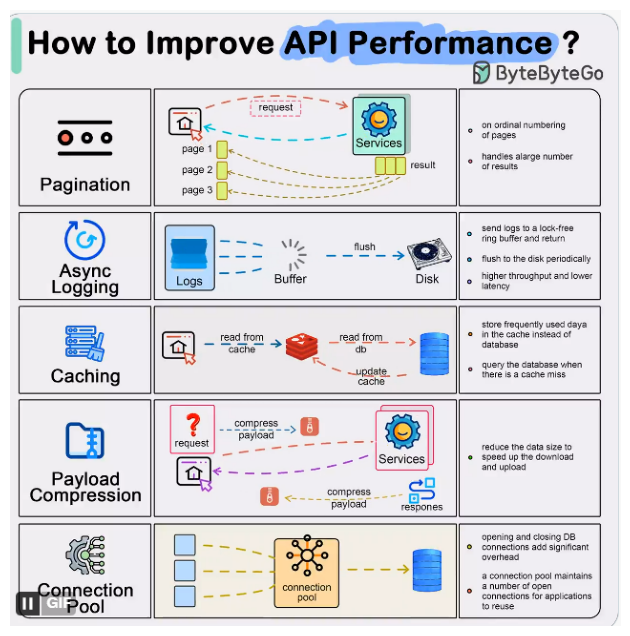

title='How to Improve API Performance?' property='API Performance' description='Various techniques to improve the performance of an API.' features=[FeaturesDescription(name='Pagination', description='Send logs to a lock-free logging buffer and flush the buffer to disk periodically.', benefits='Reduces the amount of data transferred in a single request, making the API more responsive.'), FeaturesDescription(name='Async Logging', description='Send logs to a lock-free logging buffer and flush the buffer to disk periodically.', benefits='Improves performance by reducing the time spent on logging operations.'), FeaturesDescription(name='Caching', description='Store frequently used data in the cache instead of database.', benefits='Reduces the time taken to retrieve data by serving it from the cache.'), FeaturesDescription(name='Payload Compression', description='Compress request and response payloads.', benefits='Reduces the data size to be transferred, improving the speed of data transfer.

In [3]:
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.bridge.pydantic import BaseModel, Field
from typing import List, Optional
from PIL import Image
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

class FeaturesDescription(BaseModel) :
    """Data class for defining the listed features of the image"""
    name : str = Field(description = "name of the feature")
    description : str = Field(description = "Summary of high level flow")
    benefits : str = Field(description = "benefit of the feature")

class APIFeatures(BaseModel):
    """Data class for storing text attributes of a performant API Features."""

    title : str = Field(description="Title of the image")
    property: str = Field(description="Property of the API feature.")
    description: str = Field(description="Description of the API feature.")
    features : List[FeaturesDescription] = Field(description= "List of features")

# define llm 
llm_gpt4_o = OpenAIMultiModal(model="gpt-4o", max_new_tokens=4096)

required_exts = [".PNG"]
image_documents = SimpleDirectoryReader("data", required_exts= required_exts).load_data()


# let's see one
img_doc = image_documents[0]
image = Image.open(img_doc.image_path).convert("RGB")
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(image)
plt.show()



api_features_extraction_prompt = """
Use the given image about improving the performance of API to extract data from it and store into the
provided data class.
"""

programs = MultiModalLLMCompletionProgram.from_defaults(
    output_cls= APIFeatures,
    multi_modal_llm=llm_gpt4_o,
    prompt_template_str= api_features_extraction_prompt

)


# Please ensure you're using llama-index-core v0.10.37
output = programs(image_documents=[image_documents[0]])
print(output)

